In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Normalized.csv")

In [3]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,1.695998,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
1,1.696355,-0.959273,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
2,1.696357,-1.103693,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
3,1.677730,-1.186392,-1.304105,-0.439685,-0.817176,-0.712289,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0
4,1.695994,-1.626221,-0.234635,-1.657288,-0.557447,-1.350729,-0.686984,0.331769,-0.642035,-0.715963,...,-0.908598,-0.492877,-0.279942,-0.492642,-0.492926,-0.500941,-0.297011,-0.500941,-0.500941,0


In [4]:
df.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [5]:
df.shape

(2827876, 79)

In [6]:
df['Label'].value_counts()

0    2271320
3     379737
4     158804
2      13832
5       2180
1       1956
6         47
Name: Label, dtype: int64

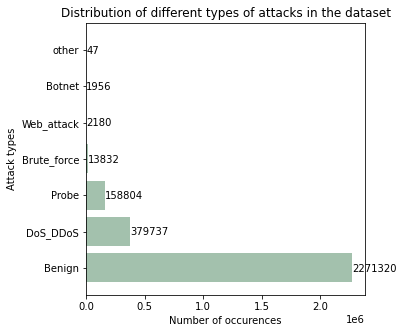

In [7]:
plt.figure(figsize=(5,5))

Labels = ('Benign', 'DoS_DDoS', 'Probe', 'Brute_force', 'Web_attack',  'Botnet', 'other')
y_pos = np.arange(len(Labels)) 
amount = df['Label'].value_counts()# [1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, Labels)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))    
plt.show()

In [11]:
#training_data = training_data.loc[df['Label'] != 4]
#testing_data = training_data.loc[df['Label'] != 4]

In [8]:
training_data = df.sample(frac=0.7, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 1979513
No. of testing examples: 848363


In [9]:
training_data['Label'].value_counts()

0    1589810
3     265694
4     111381
2       9697
5       1532
1       1367
6         32
Name: Label, dtype: int64

In [10]:
testing_data['Label'].value_counts()

0    681510
3    114043
4     47423
2      4135
5       648
1       589
6        15
Name: Label, dtype: int64

In [11]:
#Splitting dataset into features and labels.
#labels = df['Label']
#features = df.loc[:, df.columns != 'Label']

labels_train = training_data['Label']
features_train = training_data.loc[:, training_data.columns != 'Label']

labels_test = testing_data['Label']
features_test = testing_data.loc[:, testing_data.columns != 'Label']

In [12]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3)
features_train.shape, features_test.shape, labels_train.shape, labels_test.shape


((1979513, 78), (848363, 78), (1979513,), (848363,))

In [13]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    fig, ax = plt.subplots(figsize=(10, 10))
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        plot_confusion_matrix(clf, X_train, y_train,ax=ax) 
        plt.show() 
        
        
        

    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        plot_confusion_matrix(clf, X_test, y_test,ax=ax) 
        plt.show()

In [14]:
clf = LogisticRegression(random_state=42)
clf.fit(features_train, labels_train) 

/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Train Result:

accuracy score: 0.9906

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   1589810
           1       0.89      0.37      0.52      1367
           2       0.98      0.98      0.98      9697
           3       0.96      0.98      0.97    265694
           4       0.99      1.00      1.00    111381
           5       0.32      0.00      0.01      1532
           6       0.00      0.00      0.00        32

    accuracy                           0.99   1979513
   macro avg       0.73      0.62      0.64   1979513
weighted avg       0.99      0.99      0.99   1979513


Confusion Matrix: 
 [[1578162      60     233   10584     755      15       1]
 [    861     506       0       0       0       0       0]
 [    160       0    9499      27      11       0       0]
 [   4169       0       1  261494      30       0       0]
 [     64       0       1     100  111216       0       0]
 [   1513       0      

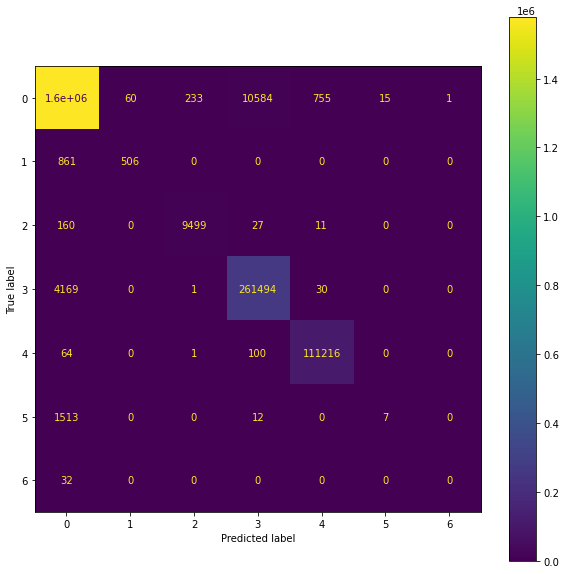

In [15]:
print_score(clf, features_train,labels_train, features_test, labels_test, train=True)
#training result

Test Result:

accuracy score: 0.9905



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    681510
           1       0.91      0.38      0.54       589
           2       0.97      0.98      0.98      4135
           3       0.96      0.98      0.97    114043
           4       0.99      1.00      1.00     47423
           5       0.50      0.01      0.01       648
           6       0.00      0.00      0.00        15

    accuracy                           0.99    848363
   macro avg       0.76      0.62      0.64    848363
weighted avg       0.99      0.99      0.99    848363


Confusion Matrix: 
 [[676478     22    108   4574    324      4      0]
 [   364    225      0      0      0      0      0]
 [    70      0   4050     10      5      0      0]
 [  1843      0      1 112178     21      0      0]
 [    17      0      0     45  47361      0      0]
 [   633      0      0     11      0      4      0]
 [    15      0      0      0      0      0  

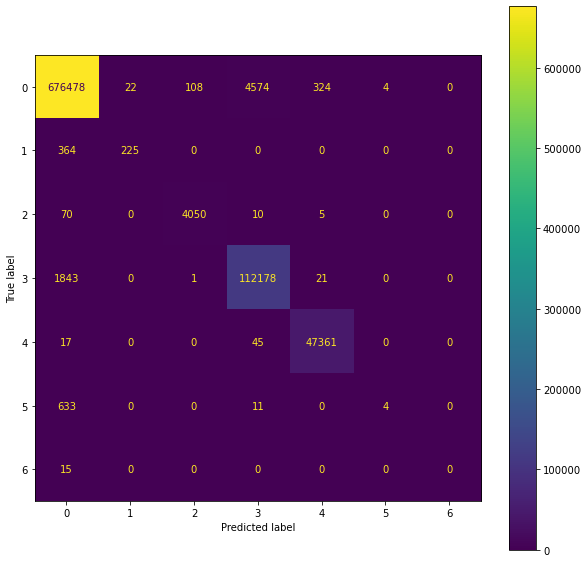

In [16]:
print_score(clf, features_train,labels_train, features_test, labels_test, train=False) 
#testing result

In [17]:
from joblib import dump, load
dump(clf, 'LogisticRegression1.model')

['LogisticRegression1.model']

In [18]:
import math
gan_df = pd.read_csv('Generated_sample.csv')
gan_df.drop('Unnamed: 0' , axis = 1 , inplace =True)
gan_df.head(10)

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,-0.459144,0.085274,0.240084,0.930689,-0.276472,1.350602,-0.170113,-0.917232,-0.463696,0.882105,...,-0.840757,-0.444501,-0.279157,-0.451358,-0.431238,-0.469557,-0.253950,-0.492483,-0.443649,2.718807
1,-0.532525,0.336711,0.221567,0.986129,-0.326226,1.513589,-0.149951,-0.984836,-0.491035,0.953570,...,-0.889071,-0.505402,-0.301250,-0.491262,-0.457482,-0.502724,-0.296481,-0.491243,-0.468101,2.980018
2,-0.524784,0.852361,0.319243,1.160202,-0.371111,1.722526,-0.282636,-1.101251,-0.513065,1.131595,...,-1.111123,-0.449634,-0.373656,-0.483931,-0.546717,-0.642743,-0.282576,-0.600369,-0.557923,3.319430
3,-0.438450,0.588646,-0.271242,0.886539,-0.422280,1.387528,-0.178980,-0.894761,-0.340922,0.995208,...,-0.872311,-0.441382,-0.290450,-0.463084,-0.446277,-0.442476,-0.235062,-0.466870,-0.420811,2.683105
4,-0.410993,0.651405,-0.296635,0.941144,-0.434272,1.381380,-0.213349,-0.885433,-0.370413,1.049478,...,-0.872205,-0.449754,-0.292223,-0.464305,-0.457972,-0.403181,-0.271818,-0.485173,-0.420672,2.735113
5,-0.463084,0.750041,-0.326220,1.065835,-0.507639,1.609692,-0.238769,-1.021632,-0.440928,1.212783,...,-1.028316,-0.512807,-0.343769,-0.540327,-0.530444,-0.485582,-0.309404,-0.599417,-0.504833,3.200650
6,-0.444191,0.660019,-0.298927,0.951819,-0.449466,1.476635,-0.194347,-0.943506,-0.382021,1.100944,...,-0.933851,-0.482515,-0.307304,-0.485461,-0.476420,-0.479861,-0.256112,-0.523545,-0.445831,2.920707
7,-0.609602,0.209315,0.296773,1.223601,-0.355154,1.731387,-0.272223,-1.152826,-0.582774,1.186592,...,-1.058991,-0.558859,-0.319479,-0.545870,-0.538428,-0.503069,-0.236482,-0.651681,-0.535902,3.515975
8,-0.560382,0.416730,0.280396,1.023498,-0.368008,1.626376,-0.205847,-1.074645,-0.538324,1.041522,...,-0.984167,-0.543986,-0.308810,-0.550361,-0.486102,-0.550879,-0.307589,-0.563191,-0.525944,3.234569
9,-0.425611,0.729029,-0.322086,1.033918,-0.475782,1.522625,-0.232831,-0.964269,-0.407366,1.166715,...,-0.985910,-0.489929,-0.327681,-0.514455,-0.501794,-0.432515,-0.285933,-0.560454,-0.472245,3.013362


In [19]:
gan_df.Label = gan_df.Label.apply(lambda x : math.floor(x))

In [20]:
gan_df['Label'].value_counts()

3    27967
2    21471
4      546
5       15
6        1
Name: Label, dtype: int64

In [21]:
gan_df.shape

(50000, 79)

In [22]:
#Splitting dataset into features and labels.
labels = gan_df['Label']
features = gan_df.loc[:, gan_df.columns != 'Label']

Result on Gan Dataset :

accuracy score: 0.5593

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00     21471
           3       0.56      1.00      0.72     27967
           4       0.00      0.00      0.00       546
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         1

    accuracy                           0.56     50000
   macro avg       0.09      0.17      0.12     50000
weighted avg       0.31      0.56      0.40     50000


Confusion Matrix: 
 [[    0     0     0     0     0     0]
 [   14     0 21457     0     0     0]
 [    0     0 27967     0     0     0]
 [    0     0   546     0     0     0]
 [    0     0    15     0     0     0]
 [    0     0     1     0     0     0]]



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/an

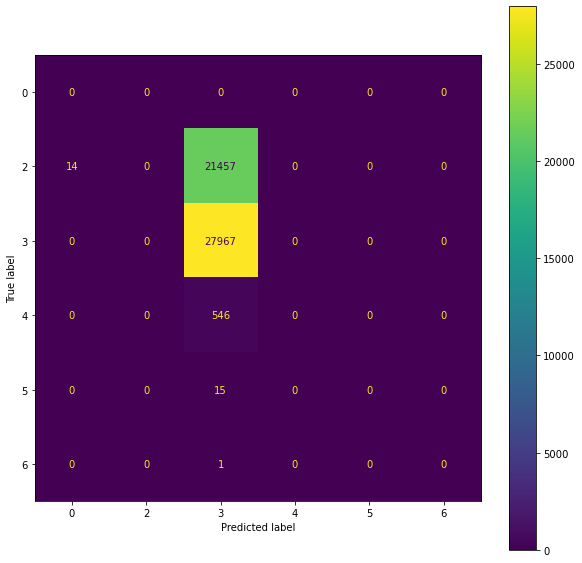

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
print("Result on Gan Dataset :\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(labels, clf.predict(features))))
print("Classification Report: \n {}\n".format(classification_report(labels, clf.predict(features))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(labels, clf.predict(features))))
plot_confusion_matrix(clf, features, labels,ax=ax) 
plt.show() 

In [24]:
gan_df = pd.concat([gan_df, testing_data]) 

In [25]:
gan_df.shape

(898363, 79)

In [26]:
gan_df['Label'].value_counts()

0    681510
3    142010
4     47969
2     25606
5       663
1       589
6        16
Name: Label, dtype: int64

In [27]:
#Splitting dataset into features and labels.
labels = gan_df['Label']
features = gan_df.loc[:, gan_df.columns != 'Label']

Result on Gan Dataset :

accuracy score: 0.9665



/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ebtehaj/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    681510
           1       0.91      0.38      0.54       589
           2       0.97      0.16      0.27     25606
           3       0.84      0.99      0.91    142010
           4       0.99      0.99      0.99     47969
           5       0.50      0.01      0.01       663
           6       0.00      0.00      0.00        16

    accuracy                           0.97    898363
   macro avg       0.74      0.50      0.53    898363
weighted avg       0.97      0.97      0.96    898363


Confusion Matrix: 
 [[676478     22    108   4574    324      4      0]
 [   364    225      0      0      0      0      0]
 [    84      0   4050  21467      5      0      0]
 [  1843      0      1 140145     21      0      0]
 [    17      0      0    591  47361      0      0]
 [   633      0      0     26      0      4      0]
 [    15      0      0      1      0      0  

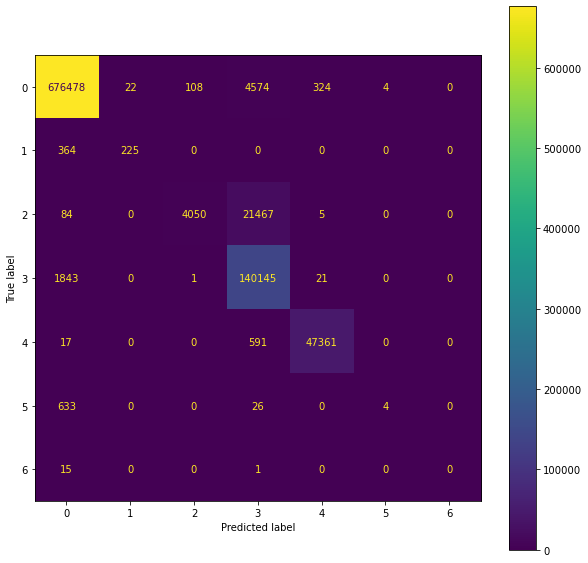

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
print("Result on Gan Dataset :\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(labels, clf.predict(features))))
print("Classification Report: \n {}\n".format(classification_report(labels, clf.predict(features))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(labels, clf.predict(features))))
plot_confusion_matrix(clf, features, labels,ax=ax) 
plt.show() 

In [29]:
from joblib import dump, load
dump(clf, 'LogisticRegression2.model')

['LogisticRegression2.model']